In [1]:
'''
LOADING MODULES AND DATA
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


training_data = pd.read_csv("titanic/train.csv")
eval_data = pd.read_csv("titanic/test.csv")

-------------------------


In [2]:
'''
DATA EXPLORATION
'''
print(training_data.info())
print(training_data.sample(5))
for col in [col for col in training_data.columns if col not in ['PassengerId','Age','Name','Fare','Ticket']]:
    print(col+": ",training_data[col].unique())
    
print("How many passengers have their cabin listed as 'nan'?")
print(training_data["Cabin"].isnull().sum(),"out of", training_data["Cabin"].size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
     PassengerId  Survived  Pclass  \
269          270         1       1   
717          718         1       2   
797          798         1       3   
617          618         0       3   
781          782         1       1   

                                                Name     Sex   Age  SibSp  \
269                           Bissette, Miss. Amelia  female  35.0      0   
717              Troutt, Mi

In [3]:
'''
FILLING IN NULL DATA
'''

print("Counts of NaN entries by column: \n",training_data.isnull().sum())

# Most passengers were not in a cabin. 
# Reduce Cabin to either Cabin or Not Cabin

# Fill Nans for Cabin
training_data.loc[training_data["Cabin"].notnull(),"Cabin"] = "Cabin"
training_data["Cabin"].fillna("Not Cabin", inplace = True)

fig1, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(10,10))
ax1.hist(training_data["Age"])
ax2.hist(training_data.loc[training_data["Embarked"].notnull(),"Embarked"])
fig1.show()

# Since the ages of passengers approximately exhibit a skewed Gaussian,
#   a good estimator for the age would be the median
median_age = training_data["Age"].median()
training_data["Age"].fillna(median_age, inplace = True)

# Since the origin location is overwhelmingly "S", 
#   S would make for a good estimator for the Embarked variable
training_data["Embarked"].fillna("S", inplace = True)


Counts of NaN entries by column: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Counts of NaN entries by column: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


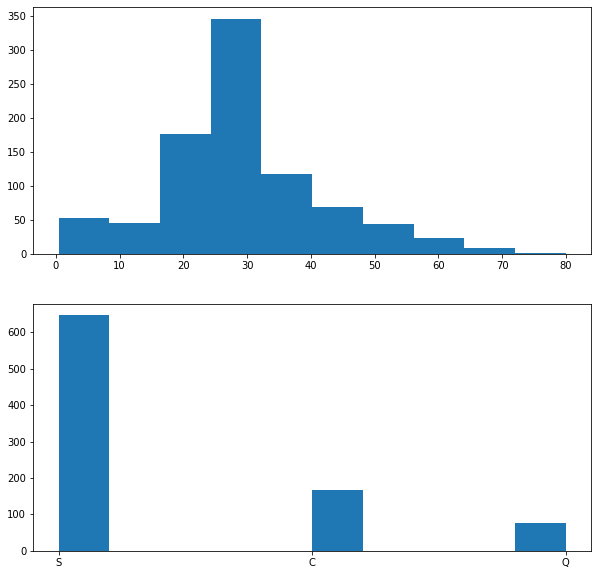

In [4]:
print("Counts of NaN entries by column: \n",training_data.isnull().sum())

fig2, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(10,10))
ax1.hist(training_data["Age"])
ax2.hist(training_data["Embarked"])
fig2.show()


In [5]:
'''
ONE HOT ENCODING OF CATEGORICAL VARIABLES
'''
 
print(training_data.columns)
print(training_data.sample(1))
training_data = pd.get_dummies(training_data,columns=["Sex", "Pclass","Embarked","Cabin"])
print(training_data.columns)
print(training_data.sample(1))


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId  Survived  Pclass                               Name   Sex  \
536          537         0       1  Butt, Major. Archibald Willingham  male   

      Age  SibSp  Parch  Ticket   Fare  Cabin Embarked  
536  45.0      0      0  113050  26.55  Cabin        S  
Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Cabin',
       'Cabin_Not Cabin'],
      dtype='object')
     PassengerId  Survived                         Name   Age  SibSp  Parch  \
475          476         0  Clifford, Mr. George Quincy  28.0      0      0   

     Ticket  Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  \
475  110465  52.0           0         1         1         0         0   

 

In [6]:
'''
TRYING DIFFERENT MODELS
'''

# Training Data
Features = training_data.drop(["Survived","Name","Ticket", "PassengerId"],axis=1)
Outcome = training_data["Survived"]

# 5-fold Cross Validation on a model
def test_model(model):
    scores = cross_val_score(model,Features,Outcome,cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Models to Try
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    gaussian_process.GaussianProcessClassifier(),
    
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    neighbors.KNeighborsClassifier(),
    
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ]

for model in MLA:
    test_model(model)
    

Accuracy: 0.80 (+/- 0.07)
Accuracy: 0.80 (+/- 0.05)
Accuracy: 0.80 (+/- 0.04)
Accuracy: 0.83 (+/- 0.04)
Accuracy: 0.81 (+/- 0.04)
Accuracy: 0.72 (+/- 0.05)
Accuracy: 0.80 (+/- 0.03)
Accuracy: 0.64 (+/- 0.27)
Accuracy: 0.80 (+/- 0.04)
Accuracy: 0.75 (+/- 0.09)
Accuracy: 0.65 (+/- 0.15)
Accuracy: 0.77 (+/- 0.04)
Accuracy: 0.77 (+/- 0.06)
Accuracy: 0.71 (+/- 0.06)
Accuracy: 0.73 (+/- 0.07)
Accuracy: 0.73 (+/- 0.08)
Accuracy: 0.72 (+/- 0.09)
Accuracy: 0.77 (+/- 0.07)
Accuracy: 0.78 (+/- 0.05)
Accuracy: 0.80 (+/- 0.04)
Accuracy: 0.60 (+/- 0.27)


In [13]:
'''
OPTIMIZING HYPERPARAMETERS ON OPTIMAL MODEL
'''
# It looks like ensemble.GradientBoostingClassifier() is the best classifier
#   with an accuracy of 0.83 +/- 0.04

# Optimizing Hyperparameters of the GradientBoosting Classifier
from sklearn import model_selection

model = ensemble.GradientBoostingClassifier()
param_grid = {'n_estimators':[50,100,150,200]}

tuned_model = model_selection.GridSearchCV(model,
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1)
tuned_model.fit(Features, Outcome)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

Counts of NaN entries by column: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


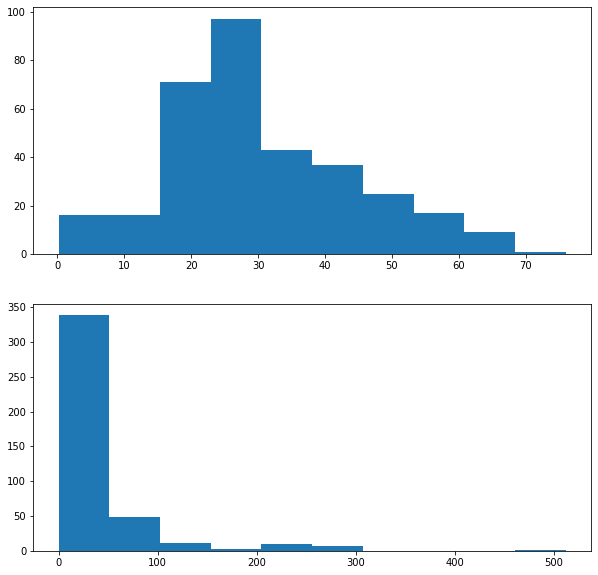

In [8]:
'''
FILLING IN NULL DATA OF EVALUATION DATA
'''

print("Counts of NaN entries by column: \n",eval_data.isnull().sum())

# Fill Nans for Cabin
eval_data.loc[eval_data["Cabin"].notnull(),"Cabin"] = "Cabin"
eval_data["Cabin"].fillna("Not Cabin", inplace = True)

fig1, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(10,10))
ax1.hist(eval_data["Age"])
ax2.hist(eval_data.loc[eval_data["Fare"].notnull(),"Fare"])
fig1.show()

# Since the ages of passengers approximately exhibit a skewed Gaussian,
#   a good estimator for the age would be the median
median_age = eval_data["Age"].median()
eval_data["Age"].fillna(median_age, inplace = True)

# Since the fares of passengers are heavily skewed,
#   a good estimator for the fares would be the median
median_fare = eval_data["Fare"].median()
eval_data["Fare"].fillna(median_fare, inplace = True)

Counts of NaN entries by column: 
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


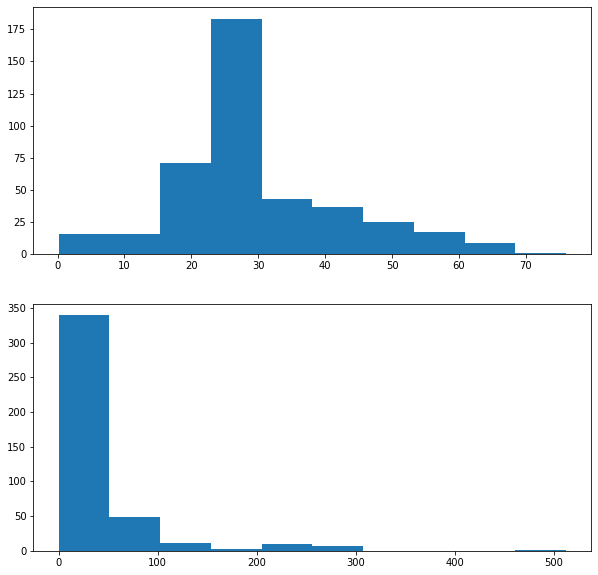

In [9]:
print("Counts of NaN entries by column: \n",eval_data.isnull().sum())

fig2, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(10,10))
ax1.hist(eval_data["Age"])
ax2.hist(eval_data["Fare"])
fig2.show()


In [10]:
'''
ONE HOT ENCODING OF CATEGORICAL VARIABLES OF EVALUATION DATA
'''
 
print(training_data.columns)
print(training_data.sample(1))
eval_data = pd.get_dummies(eval_data,columns=["Sex", "Pclass","Embarked","Cabin"])
print(training_data.columns)
print(training_data.sample(1))


Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Cabin',
       'Cabin_Not Cabin'],
      dtype='object')
     PassengerId  Survived                 Name   Age  SibSp  Parch  Ticket  \
109          110         1  Moran, Miss. Bertha  28.0      1      0  371110   

      Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
109  24.15           1         0         0         0         1           0   

     Embarked_Q  Embarked_S  Cabin_Cabin  Cabin_Not Cabin  
109           1           0            0                1  
Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Cabin',
       'Cabin_Not Cabin'],
      dtype='object')
     PassengerId  Survived    

In [14]:
'''
PREDICTING SURVIVAL FROM EVALUATION DATA
'''
Eval_Features = eval_data.drop(["Name","Ticket", "PassengerId"],axis=1)
Outcomes = tuned_model.predict(Eval_Features)

In [15]:
'''
SAVING PREDICTIONS TO CSV FOR SUBMISSION
'''
output = pd.DataFrame({"PassengerId": eval_data["PassengerId"], "Survived": Outcomes})
output.to_csv("evaluation_results.csv",index=False)